In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

df = pd.read_csv('baf_modified.csv' ,delimiter = ',')

In [4]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41171,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41172,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [5]:
len(df[df.y == 'no'])

36535

In [6]:
len(df[df.y == 'yes'])

4639

In [7]:
len(df[df.y == 'no'])/len(df[df.y == 'yes'])

7.875619745634835

In [8]:
df = df.drop(columns = 'duration')

In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41171,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41172,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [10]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_columns 


['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
categorical_columns.remove('y')

In [12]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41170,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41171,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41172,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# Random Forest Classifier (without resampling)

In [15]:
data1 = pd.get_dummies(df, columns=categorical_columns)

In [16]:
data1

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,no,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41169,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,...,0,0,1,0,0,0,0,0,1,0
41170,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,...,0,0,1,0,0,0,0,0,1,0
41171,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,no,...,0,0,1,0,0,0,0,0,1,0
41172,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,yes,...,0,0,1,0,0,0,0,0,1,0


In [17]:
X = data1.drop('y', axis=1)  
y = data1['y']  

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [22]:
confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', confusion)

Confusion Matrix:
 [[7058  223]
 [ 682  272]]


In [23]:
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

          no       0.91      0.97      0.94      7281
         yes       0.55      0.29      0.38       954

    accuracy                           0.89      8235
   macro avg       0.73      0.63      0.66      8235
weighted avg       0.87      0.89      0.87      8235



# Logistic Regression (without resampling)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
# Load your dataset (replace 'data.csv' with your dataset's file path)
data4 = df.copy()
data4 = pd.get_dummies(data4, columns=categorical_columns)

# Separate features (X) and target variable (y)
X = data4.drop('y', axis=1)
y = data4['y']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Create and train logistic regression with class weight balancing
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

C:\Users\deadl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [28]:
y_pred = logistic_reg.predict(X_test)

In [29]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8961748633879781
Classification Report:
               precision    recall  f1-score   support

          no       0.90      0.99      0.94      7281
         yes       0.69      0.19      0.29       954

    accuracy                           0.90      8235
   macro avg       0.80      0.59      0.62      8235
weighted avg       0.88      0.90      0.87      8235



In [86]:
models = ["Random Forest","Logistic Regression", 'adaboost(randomforest)', 'adaboost (logistic regression)', "XGBoost",]
accuracy_ar = []
precision_ar = []
recall_ar = []

# Randomforest (resampling)

In [79]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

In [66]:
# Load your dataset (replace 'data.csv' with your dataset's file path)
data2 = df.copy()
data2 = pd.get_dummies(data2, columns=categorical_columns)

# Separate features (X) and target variable (y)
X = data2.drop('y', axis=1)
y = data2['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
pipeline = Pipeline([
    ('oversample', SMOTE(sampling_strategy=1.0)),  # Adjust the sampling strategy as needed
    #('undersample', RandomUnderSampler(sampling_strategy=0.2))  # Adjust the sampling strategy as needed
])

In [68]:
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [69]:
# Instantiate and train a Random Forest classifier (or any other classifier of your choice)
clf = RandomForestClassifier(n_estimators=160)
clf.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=160)

In [70]:
# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)
print(f'Classification Report:\n{report}')

Accuracy: 0.8862173649058895
Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.95      0.94      7281
         yes       0.51      0.37      0.43       954

    accuracy                           0.89      8235
   macro avg       0.72      0.66      0.68      8235
weighted avg       0.87      0.89      0.88      8235



In [81]:
precision_yes = precision_score(y_test, y_pred, pos_label='yes')
recall_yes = recall_score(y_test, y_pred, pos_label='yes')

print("Precision for 'yes' class:", precision_yes)
print("Recall for 'yes' class:", recall_yes)


Precision for 'yes' class: 0.5124087591240876
Recall for 'yes' class: 0.36792452830188677


In [87]:
accuracy_ar.append(accuracy)
precision_ar.append(precision_yes)
recall_ar.append(recall_yes)

# Logistic Regression(resampling)

In [91]:
# Load your dataset (replace 'data.csv' with your dataset's file path)
data5 = df.copy()
data5 = pd.get_dummies(data5, columns=categorical_columns)

# Separate features (X) and target variable (y)
X = data5.drop('y', axis=1)
y = data5['y']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

In [93]:
oversampler = SMOTE(sampling_strategy=1.0)  # Adjust sampling strategy as needed
#undersampler = RandomUnderSampler(sampling_strategy=0.9)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [94]:
# Create and train logistic regression
logistic_reg = LogisticRegression( random_state=42)



logistic_reg.fit(X_train_resampled, y_train_resampled)

C:\Users\deadl\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [95]:
y_pred = logistic_reg.predict(X_test)
#y_pred = best_model.predict(X_test)

In [96]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8355798421372191
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.88      0.90      7281
         yes       0.36      0.53      0.43       954

    accuracy                           0.84      8235
   macro avg       0.65      0.70      0.66      8235
weighted avg       0.87      0.84      0.85      8235



In [97]:
precision_yes = precision_score(y_test, y_pred, pos_label='yes')
recall_yes = recall_score(y_test, y_pred, pos_label='yes')

print("Precision for 'yes' class:", precision_yes)
print("Recall for 'yes' class:", recall_yes)


Precision for 'yes' class: 0.3573466476462197
Recall for 'yes' class: 0.5251572327044025


In [98]:
accuracy_ar.append(accuracy)
precision_ar.append(precision_yes)
recall_ar.append(recall_yes)

# Boosting (w/ Randomforest)

In [102]:
# Load your dataset (replace 'data.csv' with your dataset's file path)
data3 = df.copy()
data3 = pd.get_dummies(data3, columns=categorical_columns)

# Separate features (X) and target variable (y)
X = data3.drop('y', axis=1)
y = data3['y']


oversampler = SMOTE(sampling_strategy=1.0)

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
oversampler = SMOTE(sampling_strategy=1.0)

In [104]:
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [105]:
# Create an AdaBoost classifier with a decision tree base estimator
adaboost_classifier = AdaBoostClassifier(
    base_estimator=RandomForestClassifier(max_depth=5),  # You can customize the base estimator
    n_estimators=100,  # Number of trees in the ensemble (you can adjust this)
    
)

# Train the AdaBoost classifier on the training data
adaboost_classifier.fit(X_resampled, y_resampled)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=5),
                   n_estimators=100)

In [106]:
y_pred = adaboost_classifier.predict(X_test)

In [107]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.89605343047966
Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94      7281
         yes       0.60      0.31      0.41       954

    accuracy                           0.90      8235
   macro avg       0.76      0.64      0.68      8235
weighted avg       0.88      0.90      0.88      8235



In [108]:
precision_yes = precision_score(y_test, y_pred, pos_label='yes')
recall_yes = recall_score(y_test, y_pred, pos_label='yes')

print("Precision for 'yes' class:", precision_yes)
print("Recall for 'yes' class:", recall_yes)


Precision for 'yes' class: 0.598
Recall for 'yes' class: 0.31341719077568136


In [109]:
accuracy_ar.append(accuracy)
precision_ar.append(precision_yes)
recall_ar.append(recall_yes)

# Boosting (w/ Logistic Regression)

In [113]:
# Load your dataset (replace 'data.csv' with your dataset's file path)
data6 = df.copy()
data6 = pd.get_dummies(data6, columns=categorical_columns)

# Separate features (X) and target variable (y)
X = data6.drop('y', axis=1)
y = data6['y']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
oversampler = SMOTE(sampling_strategy=1.0)  # Adjust sampling strategy as needed
#undersampler = RandomUnderSampler(sampling_strategy=0.2)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [116]:
# Create an AdaBoost classifier with logistic regression as the base estimator
logistic_reg = LogisticRegression(random_state=30)
adaboost_classifier = AdaBoostClassifier(base_estimator=logistic_reg, n_estimators=60, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

AdaBoostClassifier(base_estimator=LogisticRegression(random_state=30),
                   n_estimators=60, random_state=42)

In [117]:
y_pred = adaboost_classifier.predict(X_test)

In [118]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8591378263509412
Classification Report:
               precision    recall  f1-score   support

          no       0.94      0.90      0.92      7281
         yes       0.42      0.55      0.48       954

    accuracy                           0.86      8235
   macro avg       0.68      0.73      0.70      8235
weighted avg       0.88      0.86      0.87      8235



In [119]:
precision_yes = precision_score(y_test, y_pred, pos_label='yes')
recall_yes = recall_score(y_test, y_pred, pos_label='yes')

print("Precision for 'yes' class:", precision_yes)
print("Recall for 'yes' class:", recall_yes)

Precision for 'yes' class: 0.4183835182250396
Recall for 'yes' class: 0.5534591194968553


In [120]:
accuracy_ar.append(accuracy)
precision_ar.append(precision_yes)
recall_ar.append(recall_yes)

# XGBoost

In [124]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [125]:
# Load your dataset (replace 'data.csv' with your dataset's file path)
data10 = df.copy()
data10 = pd.get_dummies(data10, columns=categorical_columns)

# Separate features (X) and target variable (y)
X = data10.drop('y', axis=1)
y = data10['y']

In [126]:
label_mapping = {'no': 0, 'yes': 1}

# Use the map method to apply the mapping to 'y'
y = y.map(label_mapping)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [128]:
oversampler = SMOTE(sampling_strategy=1.0)  # Adjust sampling strategy as needed
#undersampler = RandomUnderSampler(sampling_strategy=0.2)

X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [129]:
# Create an XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier on the training data
xgb_classifier.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [130]:
y_pred = xgb_classifier.predict(X_test)

In [131]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8949605343047966
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7281
           1       0.59      0.30      0.40       954

    accuracy                           0.89      8235
   macro avg       0.75      0.64      0.67      8235
weighted avg       0.88      0.89      0.88      8235



In [133]:
precision_yes = precision_score(y_test, y_pred, pos_label=1)
recall_yes = recall_score(y_test, y_pred, pos_label=1)

print("Precision for 'yes' class:", precision_yes)
print("Recall for 'yes' class:", recall_yes)

Precision for 'yes' class: 0.5917525773195876
Recall for 'yes' class: 0.3008385744234801


In [134]:
accuracy_ar.append(accuracy)
precision_ar.append(precision_yes)
recall_ar.append(recall_yes)

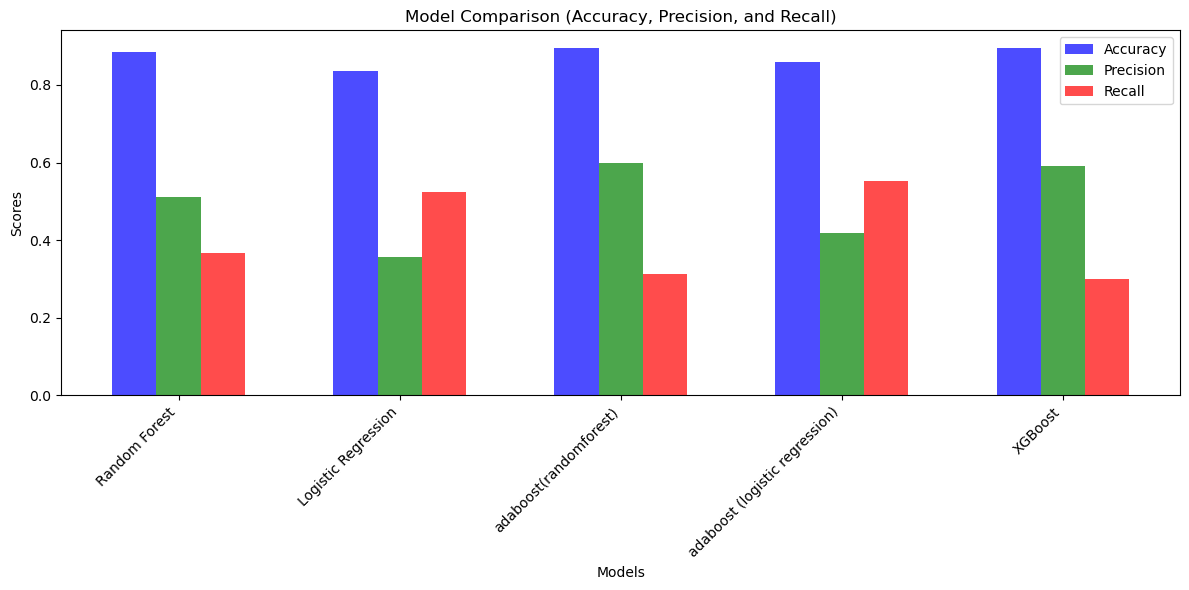

In [138]:
bar_width = 0.2
index = np.arange(len(models))  # X-axis positions for the bars

# Create subplots for accuracy, precision, and recall
plt.figure(figsize=(12, 6))

# Accuracy bars
plt.bar(index - bar_width, accuracy_ar, bar_width, label='Accuracy', color='b', alpha=0.7)

# Precision bars
plt.bar(index, precision_ar, bar_width, label='Precision', color='g', alpha=0.7)

# Recall bars
plt.bar(index + bar_width, recall_ar, bar_width, label='Recall', color='r', alpha=0.7)

# Customize the plot
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison (Accuracy, Precision, and Recall)')
plt.xticks(index, models, rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [139]:
accuracy_ar

[0.8862173649058895,
 0.8355798421372191,
 0.89605343047966,
 0.8591378263509412,
 0.8949605343047966]

In [140]:
precision_ar

[0.5124087591240876,
 0.3573466476462197,
 0.598,
 0.4183835182250396,
 0.5917525773195876]

In [141]:
recall_ar

[0.36792452830188677,
 0.5251572327044025,
 0.31341719077568136,
 0.5534591194968553,
 0.3008385744234801]